<img
src="https://www.imt-atlantique.fr/sites/default/files/Images/Ecole/charte-graphique/IMT_Atlantique_logo_RVB_Baseline_400x272.jpg"
WIDTH=200 HEIGHT=200>

<CENTER>
</br>
<p><font size="5"> TAF MCE - 2019</span></p>
<p><font size="4">  UE Numerical Methods </font></p>
<p></p>
<p><font size="5">  Notebook 06: Lab - LMS Algorithm - Statement </font></p>
</p></br>
</p>
</CENTER>


--------


# <span style="color:#00B8DE"> LMS equalization for digital data recovery </span>


> - 1  - Generate $n_s=10^4$ symbols of a BPSK modulation.
> - 2  - Convolve symbols with a filter with impulse response given by vector ${\bf h} \propto [1, .8, .3]$ and $\parallel {\bf h}\parallel = 1$. This filter represents the effect of propagation channel on transmitted symbols.
> - 3  - Add noise so as to achieve a fixed SNR at the receiver side. Plot the values of the first 20 symbols and that of the first 20 data samples as well as their sign for $SNR=20dB$. What do we note.
> - 4  - Check that even in the absence of noise the error probability $P_e$ resulting from decisions based on data thresholding would not be zero. Estimate the value of $P_e$ in the absence of equalization.
> - 5  - Implement an LMS filter with impulse response ${\bf w}$ of length $l_w=10$. The stepsize is set to half the maximum suggested stepsize and $SNR=20dB$.
> - 6  - plot the evolution of the distance $\parallel {\bf w}_{MSE}-{\bf w}_{LMS}\parallel $  between the $MSE$ estimate ${\bf w}_{MSE}$ of ${\bf w}$ and successsive LMS estimates $
{\bf w}_{LMS}$.
> - 7  - Study the convergence of the filter, depending on the SNR. 
> - 8  - Train the filter with $n_s=10^4$ symbols. Then generate data for $n_s=10^6$ symbols and $SNR=15dB$. Observe the histogram of data. Whate do you note?
> - 9  - deconvolve the sequence. Estimate the error probability $P_e$. Observe the histograms of equalizer output. remarks?
> - 10 - Analyze the influence of the different parameters (stepsize, SNR, impulse response ${\bf h}$, length of the training sequence, ...) on the behavior of the algorithm. 

## <span style="color:#00B8DE"> Data generation </span>

In [109]:
using LinearAlgebra: norm, tr
using Plots
pyplot()

Plots.PyPlotBackend()

In [349]:
using Random

n = 10000
h = [1,0.8,0.3]
h = h/norm(h)
print(h)

signal = sign.(randn(n));

[0.7602859212697054, 0.6082287370157644, 0.22808577638091163]

In [350]:
function convolution(x,h)
    l_x = size(x,1)
    l_h = size(h,2)
    y = zeros(l_x)
    
    for i = 1:l_x
        for j = 1:l_h
            if (i-j)<= 0
              y[i] = 0
            else
                y[i] += h[j]*x[i-j]
            end
        end
    end
    return y
end

convolution (generic function with 1 method)

In [351]:
SNR = 20
σ_n = 10^(-SNR/20)

y = convolution(signal,h)

y_n = y + σ_n*randn(n)


10000-element Array{Float64,1}:
 -0.16223167510378322
 -0.7515470397773442 
  0.6918591164827039 
 -0.9516096709785159 
  0.7536517199562591 
  0.7779828359333327 
 -0.6945171269332613 
  0.82442218821669   
 -0.7870156953243133 
  0.8825073822091565 
 -0.8298354693190082 
  0.7165557871596722 
  0.8873057762434982 
  ⋮                  
  0.8833561216602881 
 -0.8869123558316497 
 -0.6127853189721715 
  0.8723867905027564 
 -0.778666263096055  
 -0.5848254445819141 
  0.7696526552756692 
  0.6999759120882518 
 -0.9083845613701053 
 -0.8044869585584221 
 -0.7970388419968104 
 -0.7463556655198943 

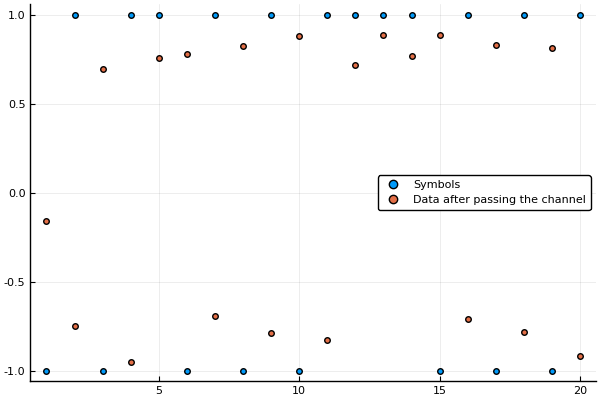

In [352]:
# Figures
scatter(signal[1:20],label="Symbols")
scatter!(y_n[1:20],label="Data after passing the channel")

In [353]:
#4
println("Pe without equalization = $(sum((abs.(y-signal)).>1)/n)")

Pe without equalization = 0.5026


## <span style="color:#00B8DE"> LMS filter </span>

In [364]:
5#

# data
#-----
p = 10
μ = 0.01 #this has to be the optimal stepsize

# Initialization of w
#--------------------
w_lms= zeros(p)
w_lms_list = w_lms

# LMS solution
#-------------
for i=p+1:n
    y_vec = y_n[i-p+1:i]
    e = signal[i] - transpose(w_lms)*y_vec
    println(e)
    w_plus = w_lms - μ * e * y_vec
    w_lms = w_plus
    w_lms_list = [w_lms_list w_lms]
    
    if i == 10
        break
    end
    
end


# 6-7

1.0
0.9490756390808415
0.9870132752685945
0.9852157579711991
-0.9989849729865559
1.0572816738012014
-1.0896544543548683
1.1260392813726527
-1.1114076242398516
1.1398496371333808
-1.0866453145685107
-0.9152507097572222
1.001639723749819
0.7511172000804072
1.186861059741671
-1.2616979689737562
1.2860748697332096
-1.3137041492357862
1.2800621199084514
-1.2181585102551247
-0.8237279949840743
1.098715376212458
0.8169627888267946
-0.8547095856775727
0.7324488468421617
-0.8086843838694158
0.9062972358466448
-0.9956564925874658
1.0989681077961442
0.7595423715608179
-0.9130190830902365
1.2101017090786046
-1.4460545186569842
-0.46589448446133996
0.7392427570887345
-0.9487929848669107
1.1792688758174121
-1.3201248251917512
-0.5892892509604652
0.9163766783840895
0.7351697717741512
1.1500762769559068
-1.3396539255631066
1.3692017289512448
0.6066992742456077
-0.9625055697957077
-0.805871841851356
0.8765006914294985
-0.831586683189774
-0.9985846433837208
-0.9245970543214623
1.131955290226261
0.821618

55.694788984441104
-38.65720456157638
20.299851084355172
-31.894045297685498
35.005712667767654
26.686627035120182
-53.80565145352776
-4.7460310732142315
-30.33932899326291
48.501933050182764
8.662592433650385
-48.73923399199714
1.1275573833268204
-26.126669599227313
5.2302303287600544
49.0469463748541
-13.522855999807792
16.338142104527677
-45.52766067659607
12.872058876116593
11.640072932700642
-29.388850122371956
54.70520979329645
-30.394869862618414
13.143508312914985
-4.236515746418911
-49.272390491955534
75.79743733192325
-34.08113424551611
-16.42567116322332
-6.961952814226461
25.888561293271216
-23.829961985291956
20.909869886522685
-6.440889065558128
6.028709538834713
30.66259439134523
-41.87585275465878
-9.700618059866272
-7.128050043589155
-16.84832464646855
58.59751026312169
-21.30900623245623
-14.591855619272568
31.2422258674155
1.0567273024650028
-9.480773470286856
5.493131386220561
-69.75962048620161
33.79330970542266
-12.93432031152512
14.432387455936666
-1.827529546978

-709.6216985718023
496.38701901413964
-627.9144245026179
734.5110441893753
56.040493247508266
-518.0876365478987
708.3945925242151
-1338.00603590377
1223.311515389706
83.91997119329267
190.1401873783983
469.2877306742808
-286.4722688646516
137.5073447496281
-585.2523290783247
787.0130519144795
119.33882856344792
754.3178801551633
-557.4803973748249
-422.70067551501546
-19.05674027238183
1098.4403538034003
624.8399267048064
185.3264607432335
-209.93792335149834
-1328.9463578301281
-70.5049834099197
-244.28910416242462
1339.2546746562934
-334.8994392753768
-81.00036313828627
-689.6308827309936
-376.48730733519
1401.3537020356866
30.667183135656273
410.5282915349105
-1459.7663619708787
110.57846470227156
-51.367611631839566
820.8226664217909
-599.5039212124746
-483.9598886969501
817.2147623731084
650.7319573250948
941.474784932109
-344.4638604222813
-1451.329039336371
972.6551673529675
177.10684473504546
966.2635218561628
-727.7598730724092
-758.3101925713598
-256.7472811628829
260.847707

-9054.54942207419
118.17278885772885
14065.587799812001
563.2526402229114
-675.8401396364334
-1679.5731607427224
-4773.958494890165
6651.719724931622
9669.92642020124
-16989.224018351222
-5925.642766116009
-2615.468285851477
11478.845260851613
-3001.988419690877
17579.83951437086
-6036.55681351866
-16899.89855938466
1819.5545213837177
-1989.819214953909
-8939.937417151534
13737.317573949555
-12994.680021648204
-3723.603275180281
21583.489375400553
-19426.55838378505
-4446.132010323516
-6577.89283017472
688.215683901868
-6637.72732473263
16422.83831918625
-10369.571902072217
4937.321833626835
1465.8245782864178
-22496.39813121288
14701.087992647368
3563.4036138598635
9707.708950607648
-3683.7701244766567
-7345.175964137161
-3227.6495595559236
4067.682589693687
20363.009283806303
3239.539512455299
-10420.336055668668
-9006.661990689943
-5874.524511356671
-9667.958523968438
26065.279459002377
-22511.39181376223
17595.333886481872
723.2946839378392
-762.8959872029864
-12479.098154333396
-7

-37426.77343045085
-343382.6099062483
50851.93769907774
175651.1953523409
126917.22861358123
338853.9966705082
-296391.6116954064
-91492.57670000251
176856.75195803941
87580.04412724575
23087.058888969506
-110661.05560029857
-226809.48046317813
324987.2420679515
112160.91622874702
-160054.72771617884
-148453.12732449366
-305040.66281210486
-11901.554445404385
360243.5843397563
-349176.4645366201
403487.7363293513
-202469.15985205065
-291113.7313067172
17695.330025111558
-68304.2822177319
-139155.68981339457
514206.70184487366
-467338.0610679226
5111.06556148667
-99027.88738564312
145166.71469008664
187517.42394690047
121578.43776793455
-71608.15300178001
-469710.1686938951
-62702.24670534102
-128327.77212857049
106049.32673650296
157607.79258868133
321701.258759205
13745.176158634771
80965.10001409485
-489367.9098495083
59310.38690085708
-465928.4978836085
561183.1471136839
-327139.3123398794
428905.8292145981
-363678.72913592105
11892.857529873058
227736.20338538464
-316052.5626707742

-5.920342213416969e6
3.145299921136168e6
-8.323814327570047e6
9.137244865596905e6
-3.0656001997843445e6
343359.8448754661
2.3625700338655575e6
2.3670929227627497e6
1.8996032190172677e6
2.8421751731918715e6
-3.6850555469939876e6
-7.528047083978091e6
-1.3916948348301826e6
-2.1020412501680003e6
1.4444556150665414e6
1.2803253523374978e7
-6.090153828716412e6
1.8353222917100242e6
-3.4956168252351442e6
168104.91139874794
-2.9262688604017175e6
5.9429506992382705e6
-3.8684770618264186e6
-5.326727411603253e6
945443.5500046927
-1.085089575190973e6
-3.4493725900263875e6
7.288375911171511e6
218467.48061163444
-1.2896546353604957e6
-268037.91527572507
2.5030066885688696e6
-6.2167844064860605e6
-1.0138887819370423e6
7.6151766880747555e6
-1.2698575895960905e7
6.215368618920399e6
8.323687093682522e6
-1.299155744960291e7
1.6697354881980984e7
-4.55364021764745e6
-1.1056110069881437e7
1.5450378873119982e7
-1.9547232209058475e7
1.231357052133016e7
-2.7368014794108463e6
1.8587727899003336e6
6.06182480431547

6.30681270304648e7
6.151700849827048e8
-7.423749620167768e7
-1.828804461644644e8
1.3987643967340457e8
-4.9399694289716536e8
2.6104109925121284e8
-5.3280488911331415e7
-3.1475484844954556e8
-2.455435705777347e6
5.551908608562678e6
3.648049372962984e8
4.471543813208107e8
-5.74370965208984e7
-3.819600268523699e8
-2.8628532507531524e8
-5.168263825519931e8
6.115341197990471e8
4.0691427551052713e8
-1.8384742999618173e8
-9.477975735097522e7
-6.720258616119349e8
5.541197800549839e8
-3.4117729289283365e7
1.503822305632463e8
1.5191702281168422e8
-3.0966981851387537e8
4.7535197046388304e8
-5.485846347422925e7
-7.413190134275905e8
4.690085146401267e8
-2.025107286806282e8
-2.744630475943893e6
7.816320341071322e8
-6.513980703371258e8
4.567588621326792e8
-2.802963987172542e8
4.856833848838872e7
6.605269931657702e7
9.498902835191472e7
3.035986182925625e8
-3.60750245672578e8
9.928313572329055e7
4.822914612971747e7
-4.5825360726720446e8
5.702589953162402e7
3.500936626225957e8
-2.8872965527713513e8
5.303

-1.717588807880906e9
5.095202468625668e9
5.511286544869117e9
2.7759762961964226e9
-3.935087814139224e9
-5.378665915126762e9
-9.164022860363852e9
7.516595044569416e8
-1.9103747772419453e8
4.324851682171602e9
4.950357190647091e9
7.982998411277716e9
-1.0524154720120096e10
7.914870801906729e9
-1.5268769371620422e10
-1.640669643597556e9
-6.2447659602668e8
8.022965809028341e9
-8.074039058683968e8
2.479652335529379e9
-5.553947816316481e8
-1.1132892773820278e10
6.386686785822617e9
3.889766940992838e9
-1.0883921053120579e10
1.6323063797491259e10
-5.375976906179414e9
1.4657812721715584e9
4.342156931197197e9
-5.846516031092093e9
-9.44157096651472e9
1.102590528666924e10
-1.2025711742475084e10
9.661681209109121e9
-2.3367520307970304e9
8.274735752552677e9
-5.177408876035406e9
1.3571148429722145e10
-2.203642648211302e10
1.0633389770104973e10
-3.339028197301235e9
7.224615191065044e9
-8.80034850431158e9
7.720807033468698e9
-8.678824893344292e9
1.5623427310277958e10
-4.855081963527565e8
4.28814907652419

1.0668435560830556e11
-7.454296246883041e10
-2.5826725032422363e10
-2.184117935375832e11
-1.543563178886177e10
1.7462025513655872e11
1.501722433525126e11
4.1272369990605194e10
-2.4693252147953113e11
-1.0913083720180011e11
6.099163874339807e10
2.647542634378327e11
2.11856399769056e11
-2.26376011053187e11
-2.459564036109466e11
-1.252573488207205e11
3.1045261619888477e11
2.1919955244962512e11
-1.1396063888482729e11
-9.645939642108585e10
-3.416008683174611e11
1.5699520434540295e11
-6.042362841439893e10
2.6957832599209375e11
-1.9547451660334854e11
9.157710071889745e10
-3.32523577887807e11
1.8866467836462982e11
1.0728444776088562e11
8.71573486115647e10
-2.4974943866357333e11
2.4763374948291626e10
1.5304392718912823e11
1.1105266607861296e11
-1.6295204537953516e11
-2.850087541013554e11
2.406061678268149e11
3.308115138195382e11
-9.952805702392221e10
-3.327536923210991e11
-3.057913110888117e11
1.2008014091151212e11
1.7838584949978476e11
1.0266801515397934e10
8.245786850082027e10
5.02635181449381

1.131409774694293e12
-1.7554713886722295e12
6.452131768556418e11
-1.9371623734140088e12
3.2056997793152227e12
-2.178104258072211e12
-1.2235333644453784e11
-2.8773317766534775e12
4.898619610233113e11
2.6337789808687217e12
-6.35138614339852e11
-7.437920668482261e11
-1.4475474217692144e12
1.9809723839537231e12
2.261611100656459e12
-2.59109968155643e12
-2.5598325630176924e12
7.648448207784376e11
4.827610186698993e12
4.2473926646164185e11
-1.4738761973345796e12
-4.764739607855895e12
1.098064383649791e12
-3.994143731662483e11
3.2746314850794453e12
-1.2225934392792532e12
2.6202120570597383e12
-1.8468541199031877e12
1.0976564038818611e12
1.7900701770751172e11
-2.3584552552624756e12
-1.9980068667538853e12
1.4410757054036733e12
4.781988614431379e12
2.8455762940993306e12
-4.546674531306782e12
-5.184563052892475e12
3.797953191721465e11
3.2817959252604272e12
1.4801868149558457e12
-1.7732363020752869e12
5.953023170883696e11
3.26314958359617e12
2.3574079511408008e11
-5.347683410032881e12
-3.289725491

-3.1970244113870234e13
1.4569594429852799e13
7.377142922795077e13
-2.601916138622996e12
-6.280811273268347e13
-9.122112636981611e12
3.288525357301078e13
6.566299438843846e13
-3.512509075202721e13
-3.64001835537973e13
-1.2910844047037139e13
7.740299320644416e13
1.7189779976530791e13
-2.6152762203720598e13
-1.4740818819168672e13
1.9002955482388312e13
1.7172914836028473e13
1.0420965491430996e13
-1.7153928588538773e13
-2.8924921313896945e13
-4.341487258798199e12
1.8154675909862984e13
1.6599472736833852e13
-6.452282837510325e13
5.308632975338484e12
2.0234894395856945e13
6.7771199609070625e12
-9.210560386924169e13
2.409773071961412e12
3.838220028676095e13
1.6590644482539736e13
-4.990352658454919e13
1.079558365541812e13
3.83169955112952e13
1.3520808141911664e13
-3.824923463411282e13
-1.822620907846825e13
6.9368390143765266e13
4.52323914736201e12
-2.1670850243905508e13
-4.757060086293261e13
4.29927700120114e13
-5.44417710911008e12
2.6092729625872016e13
3.5072162903854047e13
-4.23703214054667e1

-2.412020007847903e15
8.634241537149075e13
-2.7648281036100835e15
6.521279246284189e15
-4.136747482847377e15
4.944254268118289e15
-2.0902841826565358e15
1.8495470711270295e15
-2.425270392666524e15
-2.100361826098156e15
3.770436131515716e15
2.1447309878724735e15
-4.660550074442545e14
-7.411025103649367e15
-3.005760546955635e15
5.348997182421271e15
8.082221732442466e15
2.0305687798663968e15
-1.066294984249786e16
-6.287315488910974e15
-6.70617570328684e14
1.0614270154373032e16
6.650997926967409e15
-2.86619888833428e15
-1.1714864849892324e16
-7.654732172049597e15
8.315583005054959e15
6.846914048603043e15
-1.0450065614510548e15
-1.174545530761196e16
-1.5952781327188708e15
7.693243251000581e15
3.7795208228392395e15
-3.8289900771270025e15
-2.9154538445213245e15
7.249818216782161e15
8.050755228032837e15
-4.435133288551055e15
-1.0161300559909688e16
2.274492224919505e15
9.87621285276966e15
1.50241899722838e15
-1.15253619574975e16
-5.404645185705575e14
8.77891671301373e15
8.745220221598184e15
-6.

6.92727099929633e16
-1.4965647566179773e17
4.0988483309963456e17
1.3020493930000547e17
-3.066559119612182e17
-1.4860581543131872e16
4.359809217424104e17
3.045334922754727e17
-7.348079747254042e16
-4.516576728264767e15
-2.135280853690746e17
-3.2500663885667206e17
1.996687764893792e16
5.988322329835466e16
-4.593381424699205e17
6.070604014266317e16
8.309240649265664e17
2.953740880522969e17
-1.8555823030881024e17
2.9931818571967264e16
1.0693875068349149e17
-4.4521611714131725e17
6.850238668252833e15
-2.7539815548886816e16
-2.276547433572681e17
-5.921249238836922e17
2.789617452826123e17
1.9044391525924147e17
3.2348111739375706e17
-2.7143495637499792e17
2.4355812824154154e17
-3.1854832391821997e17
-1.9041506156880765e17
-1.2124459553663587e17
6.981918027809798e17
5.757560278825062e17
-4.5554139359888166e17
-8.101749213738006e17
-1.588586593555707e17
8.938859009163791e17
7.59749042113804e16
-7.515607276446007e17
-1.0550094202644458e18
3.218177751051161e17
1.2094103227134362e18
7.7564101801326

-3.19009816431276e19
1.2491815182796323e19
3.2863269110735856e19
9.01161025861253e18
-1.8506347769997337e19
-1.6601244786398536e19
1.2885699905763992e19
1.006172870675953e19
1.352905062321306e19
3.8636854509016197e18
-7.182803049125761e18
-5.361025157383169e15
1.6423113465814008e19
1.4988428536753172e19
-6.441666216212586e18
-1.0852646267176219e19
1.149437031892785e19
-1.5171953823790152e19
-6.72559329085457e18
-1.6365521422659269e19
3.0304371513297887e19
5.945601195982909e18
-1.6666270262462564e19
-3.657288521442744e19
-8.3829494709308e17
1.3673386739438615e19
2.094755332612535e19
-4.889416502578313e18
-1.6378691898918568e19
-3.493086482009993e18
1.4057775112852963e19
5.698666123305906e18
5.95404015898444e18
4.703916148050082e18
-6.353952611962296e18
-3.0336712739998147e18
-1.9332117422628372e18
-2.3285404761296353e18
8.949748050004967e18
-1.8571938036629803e19
-1.2271847985674654e19
2.950859499289003e18
2.4883186055852564e19
1.31886698427245e19
-2.2560896321604542e19
-3.8846427900346

3.609444411739587e20
7.376486044982064e19
-1.067544891265978e21
-1.1644494780467835e21
1.354837504494169e21
1.5677771338021022e21
-8.725655587067459e20
-1.4815968002571153e21
1.792607225267023e20
1.4647750548983943e21
-4.339065539623037e20
-1.4616703658176173e21
-3.5314158318325924e20
1.5349821908628202e21
2.2994003934251208e20
-1.1207590570547468e21
-7.855718171353416e19
1.2839259181133697e21
5.458454737730178e20
-6.232014244390037e20
-1.1020290506221234e21
-1.0376407952031003e20
1.5210543879827683e21
6.698898654104622e20
-7.478236360655319e20
-1.4871783020068633e21
3.315669823963051e20
1.6264798471164327e21
-5.829829596804002e20
-1.0691086888687128e21
1.014812537855481e21
1.4029198935454195e21
-9.584104250278263e20
-1.2760791126488992e21
1.2570889936391803e21
9.871367022308652e20
-3.296655867487299e20
-3.4029844098244293e20
-4.12735790901113e20
-2.5665947624107665e20
9.588776842506485e20
1.0603041298619656e21
-1.8942512736155067e21
-2.216401108476813e21
1.757801661524748e21
1.9926552

1.6710657580215126e22
-3.022054004880736e22
3.09012444357231e21
-6.587436855518841e21
-1.2077586092666697e22
1.012885019057628e22
-1.0787294330346562e22
-9.933765601811822e20
2.7738893692412765e22
-5.138424256574666e21
-3.0982962670056182e22
2.9977025094278313e22
1.6302378994612681e22
-4.357197502030612e22
2.569559077813991e22
1.860439859247777e22
-3.0806205965023232e22
-7.578487958342157e21
3.216501909195427e22
3.062548642929945e22
-1.7986102481625081e22
-1.6038466136367872e22
8.637358792036267e21
2.047892816545726e22
1.5526420517354042e21
-7.362660233600426e20
-4.663698897081842e21
-1.7754889207349697e22
1.4213200802124642e22
4.855604982131676e22
-1.1188852466379854e22
-4.005161741024238e22
4.826199456398596e22
1.8753673050416046e22
-5.428327771650418e22
2.275534207364403e20
4.02341848759564e22
-3.303577890810202e22
-2.3734700532478023e22
5.031672728512662e22
-1.6682569077302856e22
-4.797089918382503e22
2.091187945710812e22
3.830615735011183e22
-1.1192606270837781e22
-7.0075903317066

1.2249616098711564e24
7.239196212175462e23
-6.73579258445484e23
-1.1127052929412612e24
6.282758697002782e23
1.57513867955585e24
-7.594890282392028e23
-2.1594461875496046e24
1.6128278568841735e24
2.5978120706968314e24
-6.800171593789882e23
-1.621133653134735e24
3.500967410146405e23
7.862973777462492e23
1.0554033413398438e24
4.0837310480289105e23
-1.7812562948171084e24
-7.497710158067349e23
1.697174271016716e24
5.8045000950352064e23
-1.5602835592294104e24
-5.389547143023939e23
1.770550800043651e24
3.261673860041958e23
-2.036596556576748e24
-7.720873679253173e23
9.724735366176573e23
8.905779898887935e23
-6.610546444555158e23
-1.8258556019421552e24
-7.631416033147191e23
1.6614571581254247e24
4.46883288118763e23
-2.0285211417691732e24
-1.3321785479306123e24
1.9550256424054755e24
2.206559249703054e23
-3.566933565667074e24
-4.3088169155980074e23
2.004752434111351e24
5.2132340128447794e23
-2.0863620443226817e24
-1.0960507328053836e24
8.059198851588917e23
6.671749005676104e23
8.200475566294293e

-7.224423021732779e24
-8.43751245883031e23
2.352370437122284e25
7.211580423218463e24
-2.3385730179542734e25
-5.219824219722357e24
2.0797056992879756e25
1.1731714828136266e24
-6.911766047856778e22
-5.374849431415996e24
-1.253188390381804e24
2.091677520136394e24
6.523098963051271e24
8.533805074392979e24
-1.9702756219787273e25
-1.7223186436412502e24
1.3496006217558551e25
-5.723106861737226e21
-7.131095611653707e24
-7.683971780151721e23
1.304348256570808e25
-1.0212639871057483e25
-1.563677660088583e25
6.040735815783685e24
2.0098805372236315e25
-1.970349080397529e25
-2.3592860733645566e25
1.8631386318751163e25
1.2080936378433545e25
-5.014138492414191e24
-9.234390556745845e24
1.1734333488542574e25
-3.245752033048697e24
1.9796746413370992e24
7.633760190731396e24
9.790743657673695e23
1.3542666978927923e25
5.852708192001395e24
-6.751717927592253e24
-9.606421610254741e24
1.5469748582672918e25
2.4264937620451906e25
-2.150123225796685e25
-1.4384926740346735e25
8.726825151979197e24
-8.0694243043482

In [355]:
# MSE solution (min||w'.data-symb||)
#-----------------------------------
p = 10
D = zeros(n-p,p)

for i=1:n-p
   
    vec = y_n[i:i+p]
    
    for k=1:p
        D[i,k] = vec[k]
        
    end
    
end
signal_red = signal[1:n-p]

w_mse = inv(transpose(D)*D)*transpose(D)*signal_red

10-element Array{Float64,1}:
  0.0029573525187823685
  1.2900950160190416   
 -0.0024424378670076822
 -0.003543834066284151 
 -0.0004918349890964402
  0.0006763000606113349
  0.0014802726853924862
 -0.0021136396294158246
 -0.002951382656569532 
 -0.0013860153265537979

In [356]:
D = reshape(y_n,(1000,10))
w_mse = inv(transpose(D)*D)*transpose(D)*signal[1:1000]

10-element Array{Float64,1}:
 -0.07210520048545911  
 -0.08543940664776846  
 -0.030186642475209607 
 -0.013786522494131634 
 -0.03481351943015595  
 -0.0010338938814460994
  0.029395789938908047 
 -0.04678692401430604  
  0.09000910950428355  
  0.0018303302941093474

In [357]:
w_mse

10-element Array{Float64,1}:
 -0.07210520048545911  
 -0.08543940664776846  
 -0.030186642475209607 
 -0.013786522494131634 
 -0.03481351943015595  
 -0.0010338938814460994
  0.029395789938908047 
 -0.04678692401430604  
  0.09000910950428355  
  0.0018303302941093474

In [358]:
print(D[1,1]),print(D[1,2]),print(D[1,3]),println(D[1,4])
print(D[2,1]),print(D[2,2]),print(D[2,3]),print(D[2,4])

-0.16223167510378322-0.63098144879875570.67280914430860130.7685293887892063
-0.7515470397773442-0.75420899686973010.8475424420121652-0.9586753097169101

(nothing, nothing, nothing, nothing)

In [359]:
w_lms

10-element Array{Float64,1}:
  9.185955397189873e24 
  1.7594975514200256e24
 -1.1851165887939257e25
  3.7406282607768215e24
  1.164248503025108e25 
  4.7342783731876275e24
 -1.3713197464322508e25
 -1.1454606328642621e23
  1.185368477646263e25 
 -2.1409007329358462e24

In [360]:
e = 0
for i=1:size(w_lms_list,2)
    e = [e sum(abs.(w_mse - w_lms_list[:,i]))]
end

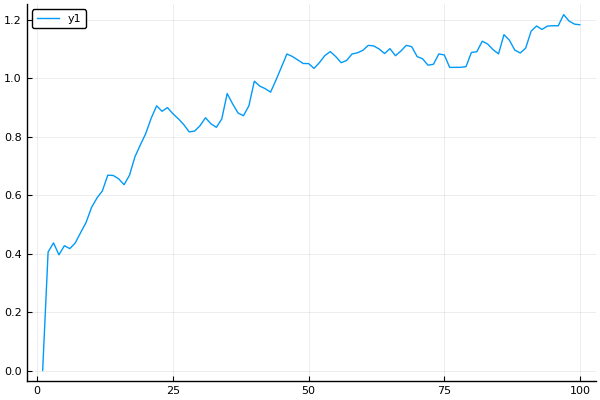

In [361]:
plot(e[1:100])

## <span style="color:#00B8DE"> Deconvolution </span>

[0.7602859212697054, 0.6082287370157644, 0.22808577638091163]

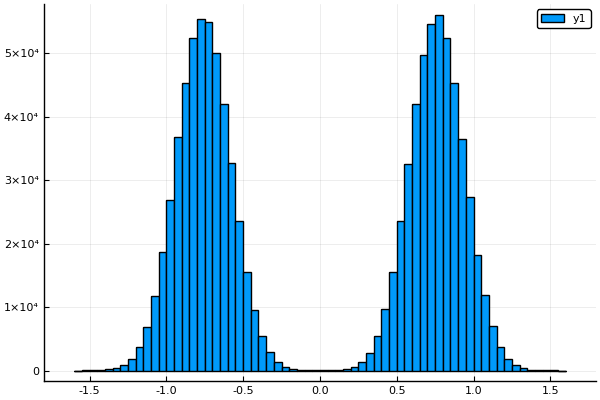

In [342]:
# 8
# Equalizer design

# Data generation

n = 1000000
h = [1,0.8,0.3]
h = h/norm(h)
print(h)

signal = sign.(randn(n));

SNR = 15
σ_n = 10^(-SNR/20)

y = convolution(signal,h)

y_n = y + σ_n*randn(n)

# data histogram

histogram(y_n)

In [343]:
# deconvolution
x_hat = convolution(y_n,w_lms)
println("Pe with equalization = $(sum((abs.(x_hat-signal)).>1)/n)")

Pe with equalization = 0.999999


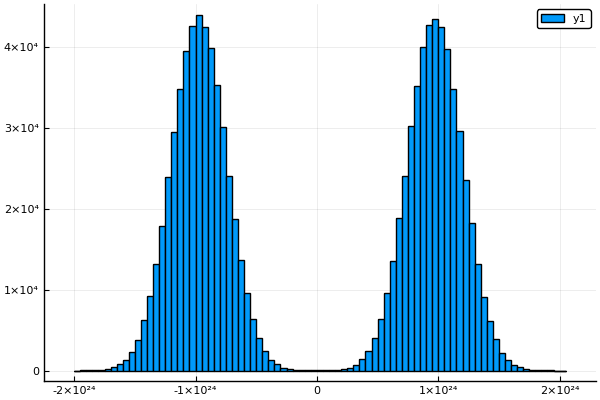

In [344]:
histogram(x_hat)

In [345]:
# deconvolution
x_hat = convolution(y_n,w_mse)
println("Pe with equalization = $(sum((abs.(x_hat-signal)).>1)/n)")

Pe with equalization = 0.50003


In [346]:
# Dhistogram of equalizer outputs
...

LoadError: syntax: invalid identifier name "..."

In [ ]:
# decisions
...

# Performance evaluation
...